## Decision Tree Regression


In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Training the Decision Tree Regression model on the whole dataset

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [6]:
# Predicting a new result

regressor.predict([[6.5]])

array([150000.])

In [7]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[ 50000.  60000.]
 [300000. 500000.]]


In [8]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('')
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 105000.0

Mean Squared Error: 20050000000.0

Root Mean Squared Error: 141598.02258506295

R2 Score: 0.5857438016528926


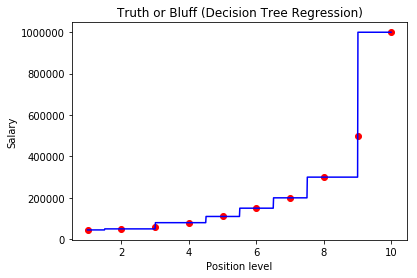

In [9]:
# Visualising the Decision Tree Regression results (higher resolution)

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()